In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### 1)
A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

### Ans:
Rolling sevens is more likely. This is because there is only 1 way to roll snake eyes -- rolling a 1 on both dice. While there are 6 ways of rolling sevens (1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, 6 + 1). This corresponds to 1/36 probability for snake eyes, and 6/36 probability for sevens.

### 2) 
Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

In [2]:
dice = [1/6 for a in range(6)]

In [3]:
convolution = np.convolve(dice,dice,mode='full')

In [4]:
convolution

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

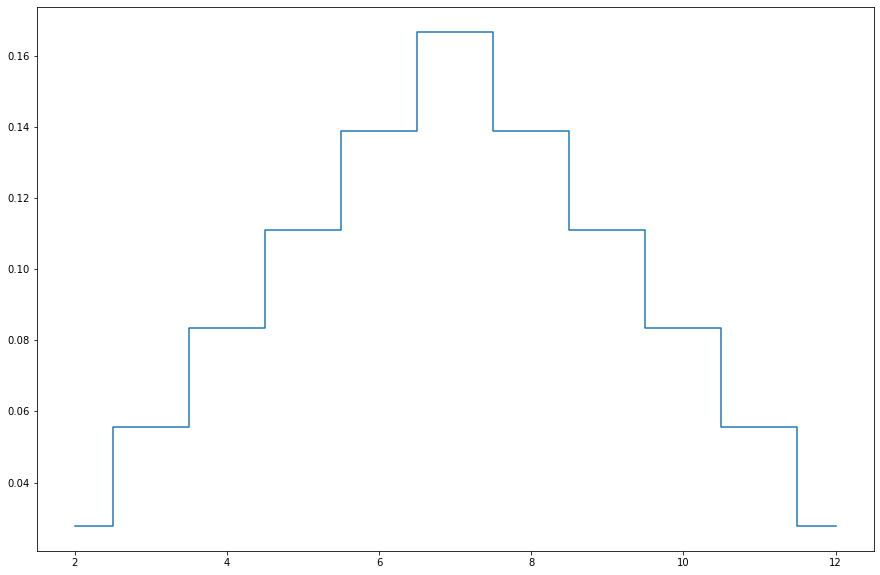

In [5]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 10)

x = np.linspace(2,12,11)
plt.step(x,convolution,where='mid')

### 3) 
Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.



In [6]:
mean = 0
for a in range(len(x)):
    mean += convolution[a] * x[a]
    
mean

7.0

For variance:
 
$$ \large{\sigma^2 = {\sum_{n=i}^{N}(x_i - \bar{x})* p(x_i)}}$$

In [7]:
variance = 0
for a in range(len(x)):
    variance += (x[a] - mean)**2 * convolution[a]

variance

5.833333333333334

### 4) 
Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.



In [19]:
repetitions = 10
dice = [1/6 for a in range(6)]

for a in range(repetitions-1):
    if a == 0:
        convolution2 = np.convolve(dice,dice)
    else:
        convolution2 = np.convolve(dice,convolution2)

In [20]:
convolution2

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

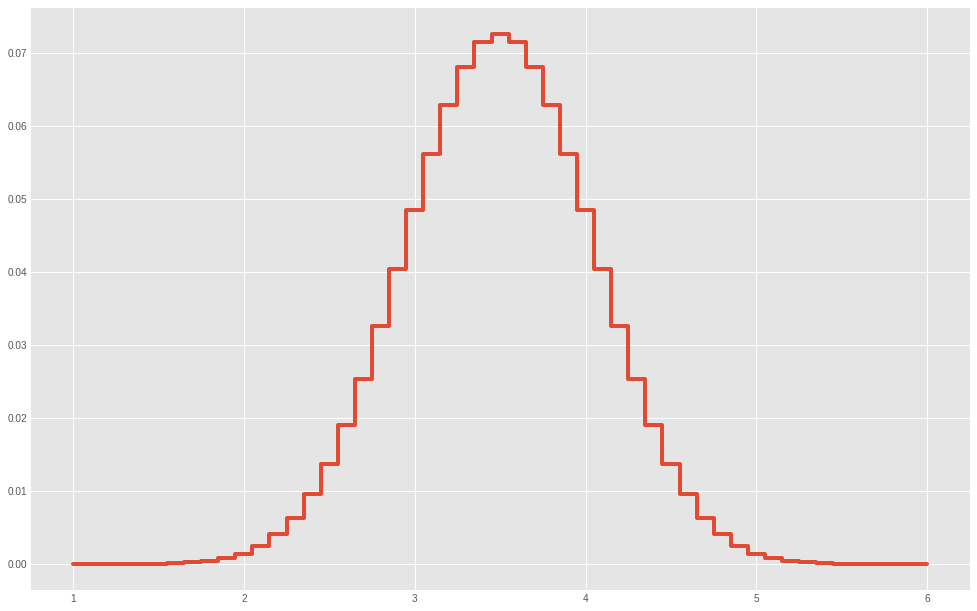

In [31]:
plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 10)

x = np.linspace(10,60,51)
plt.step(x/10,convolution2,where='mid')
#plt.vlines(35,0,max(convolution2)*1.05,linestyles = 'dashed',colors='r')

### 5) 
Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 3)
plt.tick_params(labelsize = 10)

